In [1]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/Breast Cancer Wisconsin Dataset.csv
/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/IRIS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/Breast Cancer Wisconsin Dataset.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
# Dropping the standard error and worst values of each feature, only the mean values of each feature is used in the model trainning
df.drop(['radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
# Altering the name of each column for readibility.
col_names=['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points'
         ,'symmetry','fractal_dimension']
df.columns=col_names
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [6]:
# Labeling the target diagnosis as 0 or 1.
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


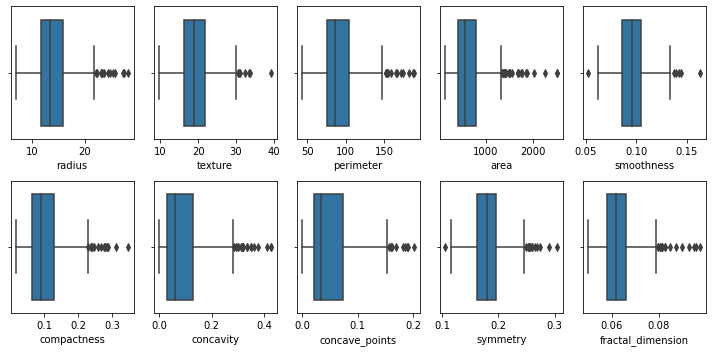

In [7]:
# Removing outliers
fig, axs = plt.subplots(2,5, figsize = (10,5))
plt1 = sns.boxplot(df['radius'], ax = axs[0,0])
plt2 = sns.boxplot(df['texture'], ax = axs[0,1])
plt3 = sns.boxplot(df['perimeter'], ax = axs[0,2])
plt4 = sns.boxplot(df['area'], ax = axs[0,3])
plt5 = sns.boxplot(df['smoothness'], ax = axs[0,4])
plt1 = sns.boxplot(df['compactness'], ax = axs[1,0])
plt2 = sns.boxplot(df['concavity'], ax = axs[1,1])
plt3 = sns.boxplot(df['concave_points'], ax = axs[1,2])
plt4 = sns.boxplot(df['symmetry'], ax = axs[1,3])
plt5 = sns.boxplot(df['fractal_dimension'], ax = axs[1,4])

plt.tight_layout()

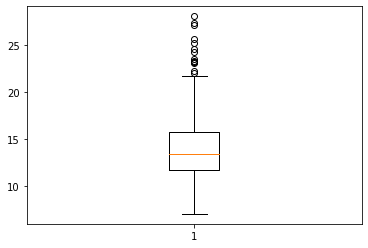

In [8]:
plt.boxplot(df.radius)
Q1 = df.radius.quantile(0.25)
Q3 = df.radius.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.radius >= Q1 - 1.5*IQR) & (df.radius <= Q3 + 1.5*IQR)]

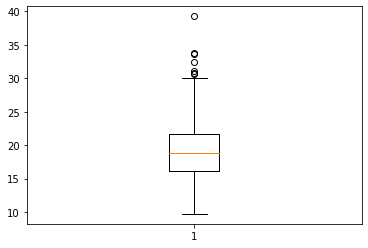

In [9]:
plt.boxplot(df.texture)
Q1 = df.texture.quantile(0.25)
Q3 = df.texture.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.texture >= Q1 - 1.5*IQR) & (df.texture <= Q3 + 1.5*IQR)]

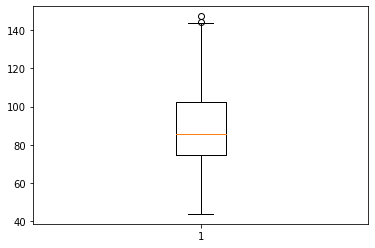

In [10]:
plt.boxplot(df.perimeter)
Q1 = df.perimeter.quantile(0.25)
Q3 = df.perimeter.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.perimeter >= Q1 - 1.5*IQR) & (df.perimeter <= Q3 + 1.5*IQR)]

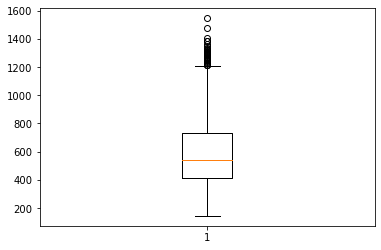

In [11]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

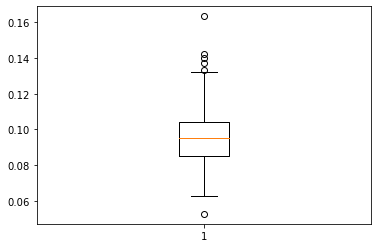

In [12]:
plt.boxplot(df.smoothness)
Q1 = df.smoothness.quantile(0.25)
Q3 = df.smoothness.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.smoothness >= Q1 - 1.5*IQR) & (df.smoothness <= Q3 + 1.5*IQR)]

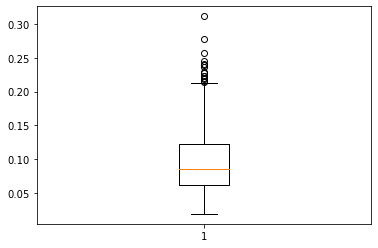

In [13]:
plt.boxplot(df.compactness)
Q1 = df.compactness.quantile(0.25)
Q3 = df.compactness.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.compactness >= Q1 - 1.5*IQR) & (df.compactness <= Q3 + 1.5*IQR)]

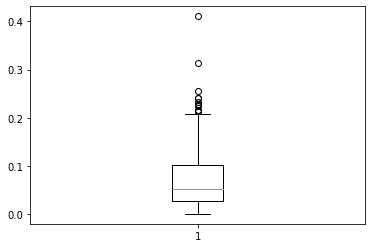

In [14]:
plt.boxplot(df.concavity)
Q1 = df.concavity.quantile(0.25)
Q3 = df.concavity.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.concavity >= Q1 - 1.5*IQR) & (df.concavity <= Q3 + 1.5*IQR)]

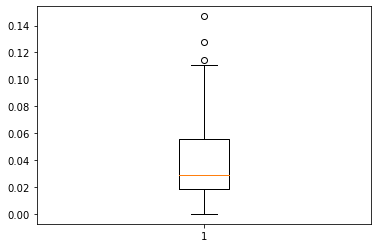

In [15]:
plt.boxplot(df.concave_points)
Q1 = df.concave_points.quantile(0.25)
Q3 = df.concave_points.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.concave_points >= Q1 - 1.5*IQR) & (df.concave_points <= Q3 + 1.5*IQR)]

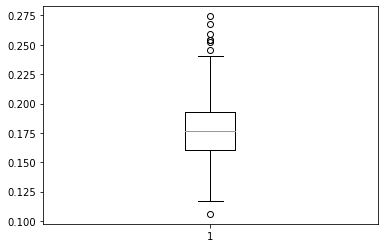

In [16]:
plt.boxplot(df.symmetry)
Q1 = df.symmetry.quantile(0.25)
Q3 = df.symmetry.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.symmetry >= Q1 - 1.5*IQR) & (df.symmetry <= Q3 + 1.5*IQR)]


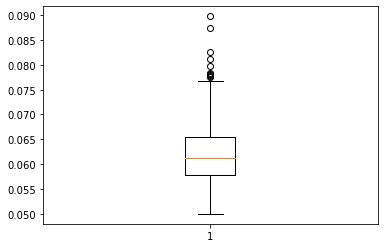

In [17]:
plt.boxplot(df.fractal_dimension)
Q1 = df.fractal_dimension.quantile(0.25)
Q3 = df.fractal_dimension.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.fractal_dimension >= Q1 - 1.5*IQR) & (df.fractal_dimension <= Q3 + 1.5*IQR)]

In [18]:
df.shape

(458, 11)

In [19]:
df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697


In [20]:
# Normalizing the data
y=df.diagnosis
x=df.drop('diagnosis', axis=1)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.info

<bound method DataFrame.info of             0         1         2         3         4         5         6  \
0   -0.359470 -0.770866 -0.219456 -0.416640  2.664545  2.195372  1.889695   
1    1.973739  0.320610  1.975060  2.148809  0.041110  0.539691  0.981024   
2    0.147400  0.537375  0.232722  0.042761  1.960638  2.046089  0.597408   
3   -0.138217  0.789842  0.072711 -0.222033  2.624999  2.825073  2.455851   
4    1.076660  1.151967  0.973512  1.044969 -0.953059 -0.608699 -0.624966   
..        ...       ...       ...       ...       ...       ...       ...   
453 -1.577164  2.335249 -1.600881 -1.354586 -1.018704 -1.069576 -1.289645   
454  0.501404  1.009157  0.599561  0.403720 -0.741887  1.191107  0.783575   
455 -0.737611  1.327929 -0.696525 -0.752077 -0.118653  0.352410  0.950802   
456  0.284174  2.149086  0.302652  0.145307  0.409672  0.637404 -0.390646   
457  1.309981  2.386253  1.305386  1.319789 -0.756123  0.357838  0.574238   

            7         8         9  
0    1.

In [21]:
# Although we already know that the final clustering should be 2, malignant or benign,
# we still need to testify it firstly if 2 is the best clustering numbers
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

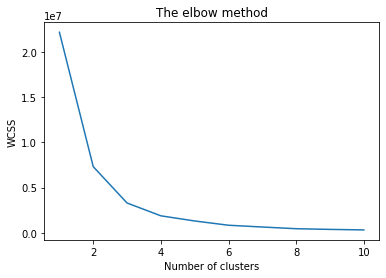

In [22]:
# Find the optimum cluster numbers for K-means.
wcss = []
# Sum of squares within the cluster.

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

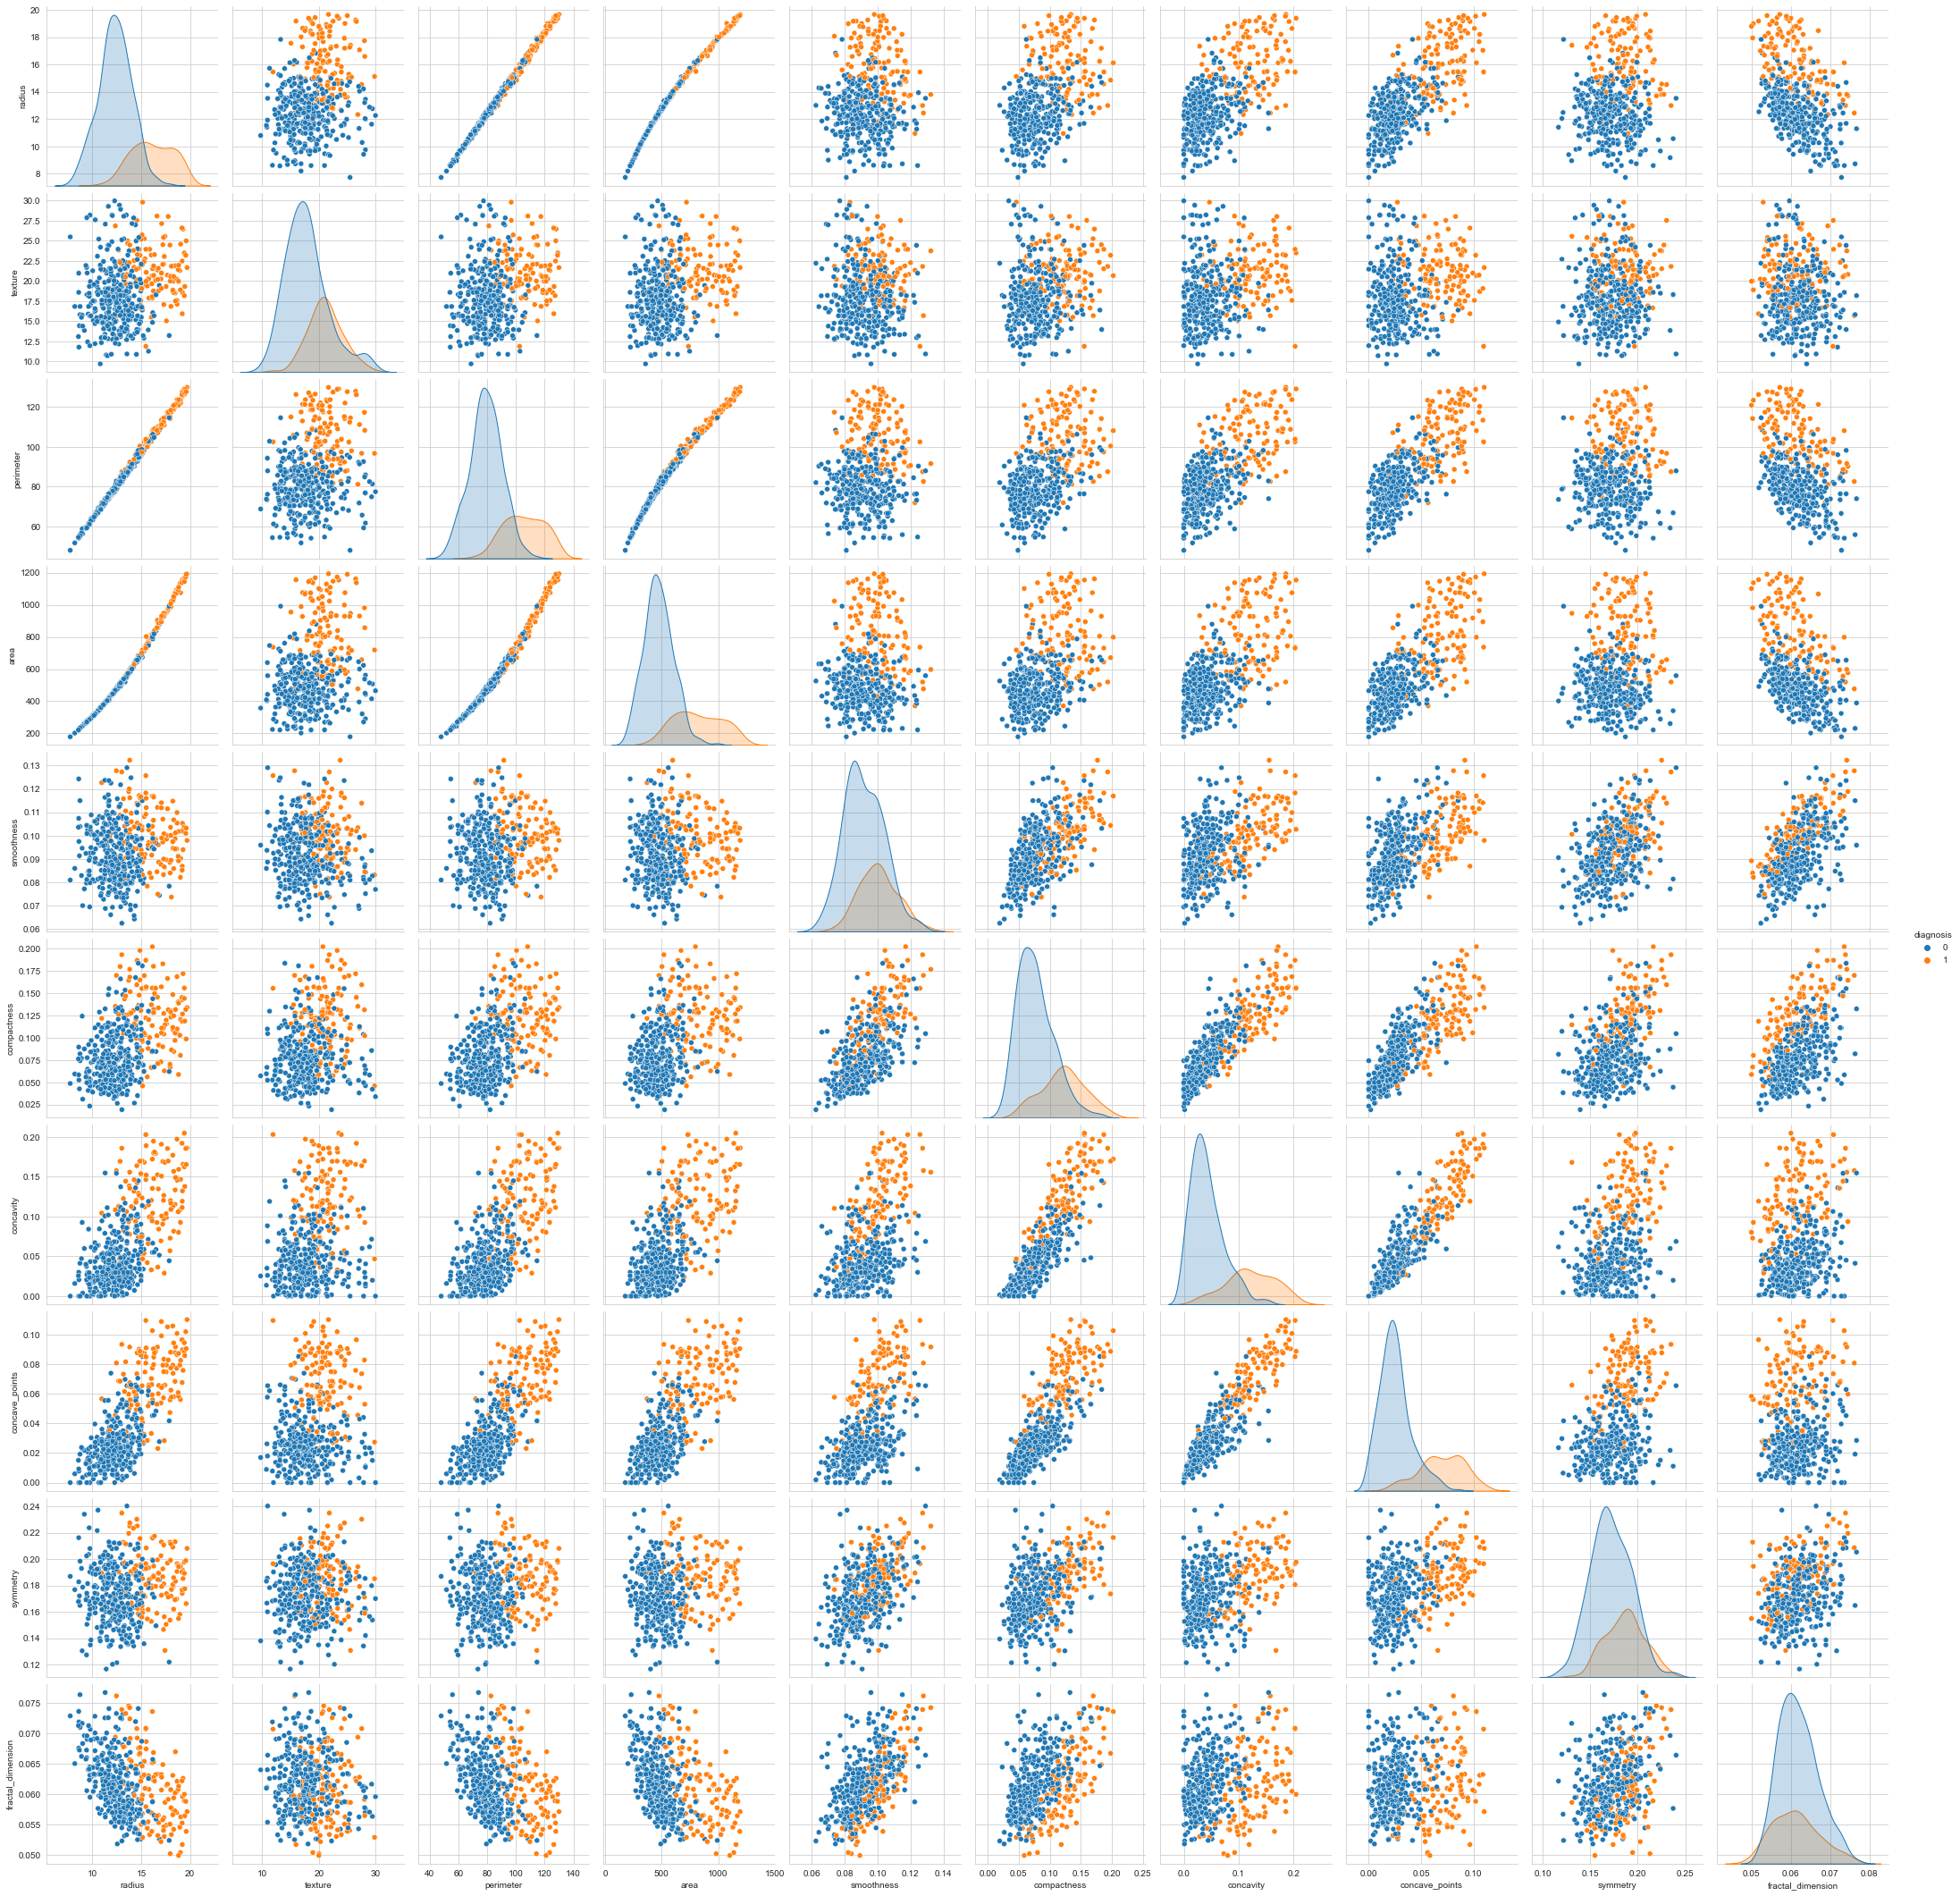

In [23]:
# The result shows that the elbow is 2. The figure actually is quite deceptive due to the scale.
# Explore scattering
sns.set_style("whitegrid")
sns.pairplot(df,hue="diagnosis",size=3);
plt.show()

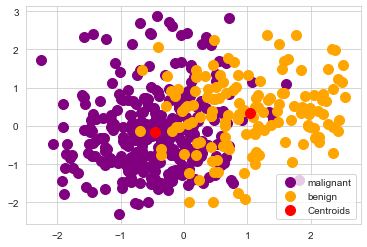

In [24]:
# I will use K-means to implement the clustering, the cluster number is 2.
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
x_scaled = x_scaled.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_scaled_kmeans = kmeans.fit_predict(x_scaled)

#Visualising the clusters
plt.scatter(x_scaled[y_scaled_kmeans == 0, 0], x_scaled[y_scaled_kmeans == 0, 1], s = 100, c = 'purple', label = 'malignant')
plt.scatter(x_scaled[y_scaled_kmeans == 1, 0], x_scaled[y_scaled_kmeans == 1, 1], s = 100, c = 'orange', label = 'benign')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [25]:
kmeans.cluster_centers_

array([[-0.4564555 , -0.15457338, -0.47442034, -0.46004193, -0.28348739,
        -0.47753966, -0.52279562, -0.55958316, -0.27155559, -0.07303078],
       [ 1.03680606,  0.3511024 ,  1.07761192,  1.04495239,  0.64392136,
         1.08469723,  1.1874929 ,  1.27105317,  0.61681913,  0.16588421]])

In [26]:
# Computing the mean Silhouette Coefficient of all samples.
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(x_scaled, y_scaled_kmeans)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.3562110748169059


In [27]:
# Computing the Kmeans score 
kmeans_score = metrics.adjusted_rand_score(y,y_scaled_kmeans)
kmeans_score

0.5840888673221322

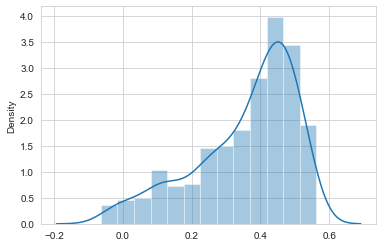

In [28]:
# Since -1 is the worst and +1 is the optimal silhouette score,
# 0.356 means some clusters are separatable while some are sort of mixed. 
# Now I will visualize the distribution of silhouette metrics.
scores = metrics.silhouette_samples(x_scaled, y_scaled_kmeans)
sns.distplot(scores);

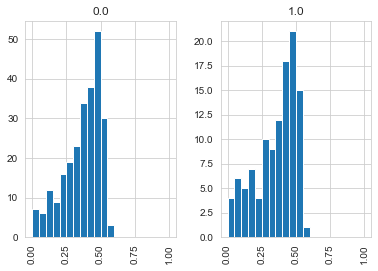

In [29]:
# Explore the distribution of silhouette score for each diagnosis result.
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['diagnosis'] = df['diagnosis']
df_scores.hist(by='diagnosis', column='SilhouetteScore', range=(0,1.0), bins=20);

In [30]:
# Therefore, when clustering by Kmeans, the two clusters are mixed.
# Now let's explore Guassian Mixture Model.
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(x_scaled)
y_scaled_gmm = gmm.predict(x_scaled)
y_scaled_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [31]:
# Comparing the GMM prediction with the original labelled species.
gmm_score = metrics.adjusted_rand_score(y,y_scaled_gmm)
gmm_score

0.5376691367487377

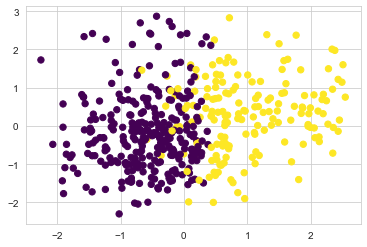

In [32]:
# The result shows that GMM behaves just so-so in clustering the breast cancer.
# Now I will visualize how GMM behaves in clustering the data.
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_scaled_gmm, s=40, cmap='viridis');

In [33]:
# The probability of any point belongs to the given cluster.
probs = gmm.predict_proba(x_scaled)
print(probs[:10].round(3))

[[0.002 0.998]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


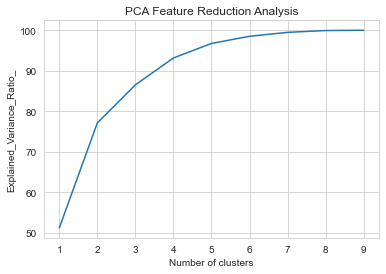

In [34]:
# Now I will apply Principal Component Analysis (PCA) to do some feature reduction.
from sklearn.decomposition import PCA
import matplotlib as mpl

pca_evr = [] # Sum of pac.explained_variance_ratio_

for i in range(1,10):
    pca = PCA(n_components=i, random_state=0)
    pca.fit(x_scaled)
    x_pca_array = pca.transform(x_scaled)
    x_pca = pd.DataFrame(x_pca_array)
    pca_evr.append(100 * np.sum(pca.explained_variance_ratio_[:i]))

plt.plot(range(1, 10), pca_evr)
plt.title('PCA Feature Reduction Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Explained_Variance_Ratio_') 
plt.show()


In [35]:
# The result above shows that when features = 3, the 3 principal components account for around 87% of the variance. 
# When features = 4, the 4 principal components account for around 93% of the variance,
# Which echoes with the decision tree modeling conclusion that when there are 4 features, the accuarcy and clarity of the tree are preserved.

pca = PCA(n_components=5, random_state=0)
pca.fit(x_scaled)
x_pca_array = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca_array,columns=['PC1','PC2','PC3','PC4','PC5'])
x_pca.info
print('5 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:5])))

5 principal components account for 96.7398% of the variance.


In [36]:
gmm.fit(x_pca)
y_gmm_pca = gmm.predict(x_pca)
gmm_pca_score = metrics.adjusted_rand_score(y,y_gmm_pca)
gmm_pca_score

0.5969561293400786

In [37]:
y_kmeans_pca = kmeans.fit_predict(x_pca)
kmeans_pca_score = metrics.adjusted_rand_score(y,y_kmeans_pca)
kmeans_pca_score

0.5840888673221322

In [39]:
pca = PCA(n_components=4, random_state=0)
pca.fit(x_scaled)
x_pca_array = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca_array,columns=['PC1','PC2','PC3','PC4'])
x_pca.info
print('4 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:4])))

4 principal components account for 93.1592% of the variance.


In [40]:
gmm.fit(x_pca)
y_gmm_pca = gmm.predict(x_pca)
gmm_pca_score = metrics.adjusted_rand_score(y,y_gmm_pca)
gmm_pca_score

0.5902032633427277

In [41]:
y_kmeans_pca = kmeans.fit_predict(x_pca)
kmeans_pca_score = metrics.adjusted_rand_score(y,y_kmeans_pca)
kmeans_pca_score

0.5913682169074074

In [42]:
pca = PCA(n_components=3, random_state=0)
pca.fit(x_scaled)
x_pca_array = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca_array,columns=['PC1','PC2','PC3'])
x_pca.info
print('3 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:3])))

3 principal components account for 86.5271% of the variance.


In [43]:
gmm.fit(x_pca)
y_gmm_pca = gmm.predict(x_pca)
gmm_pca_score = metrics.adjusted_rand_score(y,y_gmm_pca)
gmm_pca_score

0.6174936397595504

In [44]:
y_kmeans_pca = kmeans.fit_predict(x_pca)
kmeans_pca_score = metrics.adjusted_rand_score(y,y_kmeans_pca)
kmeans_pca_score

0.5913682169074074

In [46]:
pca = PCA(n_components=2, random_state=0)
pca.fit(x_scaled)
x_pca_array = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca_array,columns=['PC1','PC2'])
x_pca.info
print('2 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:2])))

2 principal components account for 77.1337% of the variance.


In [47]:
gmm.fit(x_pca)
y_gmm_pca = gmm.predict(x_pca)
gmm_pca_score = metrics.adjusted_rand_score(y,y_gmm_pca)
gmm_pca_score

0.6174936397595504

In [48]:
y_kmeans_pca = kmeans.fit_predict(x_pca)
kmeans_pca_score = metrics.adjusted_rand_score(y,y_kmeans_pca)
kmeans_pca_score

0.5913682169074074